In [106]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [83]:
loan_path = 'D:\Programming\AI_ML Expert\AI_ML Expert With Phitron Batch 01\Datasets\loan_approval.csv'
df_loan = pd.read_csv(loan_path)
df_loan.head(10)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False
5,Darren Roberts,Port Jesseville,62098,689,19217,29,65.0,True
6,Holly Wood,Lake Joseph,59256,373,40920,40,35.0,False
7,Nicholas Martin,Nelsonside,48289,524,45866,20,25.0,False
8,Patty Perez,Port Leslieview,126530,367,14826,36,55.0,False
9,Emily Rios,Wilkersonmouth,43434,446,18359,8,20.0,False


In [84]:
# 3. Drop name (too many missing values)
df_loan = df_loan.drop(columns=["name"])
df_loan

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,East Jill,113810,389,39698,27,50.0,False
1,New Jamesside,44592,729,15446,28,55.0,False
2,Lake Roberto,33278,584,11189,13,45.0,False
3,West Melanieview,127196,344,48823,29,50.0,False
4,Mariastad,66048,496,47174,4,25.0,False
...,...,...,...,...,...,...,...
1995,Robertton,92163,770,12251,13,85.0,True
1996,New Frank,38799,635,48259,17,40.0,False
1997,East Haley,41957,763,16752,5,60.0,True
1998,Adamland,139022,360,24031,35,55.0,False


In [85]:
df_loan.shape

(2000, 7)

In [86]:
print("Unique values per column:")
df_loan.nunique()

Unique values per column:


city              1882
income            1988
credit_score       537
loan_amount       1968
years_employed      41
points              19
loan_approved        2
dtype: int64

In [87]:
print("Missing values per column:")
df_loan.isnull().sum()

Missing values per column:


city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [88]:
# Check for duplicate rows in the entire DataFrame
duplicates = df_loan[df_loan.duplicated()]

# Show the duplicate rows
print("Number of duplicate rows:", len(duplicates))
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [city, income, credit_score, loan_amount, years_employed, points, loan_approved]
Index: []


In [89]:
num_duplicate_cities = df_loan.duplicated(subset=['city']).sum()
print("Number of duplicate city entries:", num_duplicate_cities)

Number of duplicate city entries: 118


In [90]:
num_duplicates = df_loan.duplicated().sum()
print("Total number of duplicate rows:", num_duplicates)

Total number of duplicate rows: 0


In [91]:
# Label Encoding for binary categorical columns -> loan_approved
le = LabelEncoder()
df_loan["loan_approved"] = le.fit_transform(df_loan["loan_approved"])
df_loan.head(10)

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,East Jill,113810,389,39698,27,50.0,0
1,New Jamesside,44592,729,15446,28,55.0,0
2,Lake Roberto,33278,584,11189,13,45.0,0
3,West Melanieview,127196,344,48823,29,50.0,0
4,Mariastad,66048,496,47174,4,25.0,0
5,Port Jesseville,62098,689,19217,29,65.0,1
6,Lake Joseph,59256,373,40920,40,35.0,0
7,Nelsonside,48289,524,45866,20,25.0,0
8,Port Leslieview,126530,367,14826,36,55.0,0
9,Wilkersonmouth,43434,446,18359,8,20.0,0


In [92]:
from sklearn.preprocessing import OneHotEncoder



# Create the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' is optional

# Select the 'city' column and encode it
city_encoded = encoder.fit_transform(df_loan[['city']])

# Get the names of the new encoded columns
encoded_columns = encoder.get_feature_names_out(['city'])

# Create a DataFrame from the encoded array
city_encoded_df = pd.DataFrame(city_encoded, columns=encoded_columns)

# Drop the original 'city' column and concatenate the encoded one
df_encoded = pd.concat([df_loan.drop('city', axis=1), city_encoded_df], axis=1)

# Show the first few rows
df_encoded.head(20)

,income,credit_score,loan_amount,years_employed,points,loan_approved,city_Adamburgh,city_Adamland,city_Adammouth,city_Adamsfort,...,city_Wilsonton,city_Wilsonview,city_Wongburgh,city_Woodsburgh,city_Wrightchester,city_Yatesbury,city_Youngbury,city_Yumouth,city_Zacharyton,city_Zamoramouth
0,113810,389,39698,27,50.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44592,729,15446,28,55.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33278,584,11189,13,45.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,127196,344,48823,29,50.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66048,496,47174,4,25.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,62098,689,19217,29,65.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,59256,373,40920,40,35.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,48289,524,45866,20,25.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,126530,367,14826,36,55.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,43434,446,18359,8,20.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
print("One-Hot Encoding Done!")
print("Shape before:", df_loan.shape)        # (10, 7)
print("Shape after: ", df_encoded.shape)

One-Hot Encoding Done!
Shape before: (2000, 7)
Shape after:  (2000, 1887)


In [94]:
print("Shape:", df_loan.shape)

Shape: (2000, 7)


In [95]:
df_loan

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,East Jill,113810,389,39698,27,50.0,0
1,New Jamesside,44592,729,15446,28,55.0,0
2,Lake Roberto,33278,584,11189,13,45.0,0
3,West Melanieview,127196,344,48823,29,50.0,0
4,Mariastad,66048,496,47174,4,25.0,0
...,...,...,...,...,...,...,...
1995,Robertton,92163,770,12251,13,85.0,1
1996,New Frank,38799,635,48259,17,40.0,0
1997,East Haley,41957,763,16752,5,60.0,1
1998,Adamland,139022,360,24031,35,55.0,0


In [96]:
from category_encoders import TargetEncoder

# Replace high-cardinality city with one powerful numeric column
df_loan['city'] = TargetEncoder(smoothing=10).fit_transform(
    df_loan['city'], df_loan['loan_approved']
)

print("High-cardinality 'city' fixed perfectly!")
print("Shape:", df_loan.shape)        # → (2000, 7)  ← only +0 columns, not +1887!
print("city column is now float → ready for any ML model")

High-cardinality 'city' fixed perfectly!
Shape: (2000, 7)
city column is now float → ready for any ML model


In [98]:
df_loan.head(20)

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,0.377156,113810,389,39698,27,50.0,0
1,0.382317,44592,729,15446,28,55.0,0
2,0.382317,33278,584,11189,13,45.0,0
3,0.382317,127196,344,48823,29,50.0,0
4,0.382317,66048,496,47174,4,25.0,0
5,0.512426,62098,689,19217,29,65.0,1
6,0.448082,59256,373,40920,40,35.0,0
7,0.382317,48289,524,45866,20,25.0,0
8,0.382317,126530,367,14826,36,55.0,0
9,0.382317,43434,446,18359,8,20.0,0


In [101]:
df_loan.shape

(2000, 7)

In [129]:
cat_cols = ["city"]
num_cols = ["income","credit_score","loan_amount","years_employed","points"]
terget_col = ["loan_approved"]

print(cat_cols)
print(num_cols)
print(terget_col)

['city']
['income', 'credit_score', 'loan_amount', 'years_employed', 'points']
['loan_approved']


In [103]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
city,2000.0,0.439559,0.062928,0.377156,0.382317,0.382317,0.512426,0.519008
income,2000.0,90585.977000,34487.874907,30053.000000,61296.250000,90387.500000,120099.750000,149964.000000
credit_score,2000.0,573.946000,160.564945,300.000000,433.000000,576.000000,715.000000,850.000000
loan_amount,2000.0,25308.503000,14207.320147,1022.000000,12748.750000,25661.500000,37380.500000,49999.000000
years_employed,2000.0,20.441000,11.777813,0.000000,10.000000,21.000000,31.000000,40.000000
points,2000.0,56.680000,18.638033,10.000000,45.000000,55.000000,70.000000,100.000000
loan_approved,2000.0,0.439500,0.496450,0.000000,0.000000,0.000000,1.000000,1.000000


In [104]:
# Look at some basic value ranges
df_loan[num_cols].agg(["min", "max", "mean","median"]).T

,min,max,mean,median
income,30053.0,149964.0,90585.977,90387.5
credit_score,300.0,850.0,573.946,576.0
loan_amount,1022.0,49999.0,25308.503,25661.5
years_employed,0.0,40.0,20.441,21.0
points,10.0,100.0,56.680,55.0


<Figure size 1200x800 with 0 Axes>

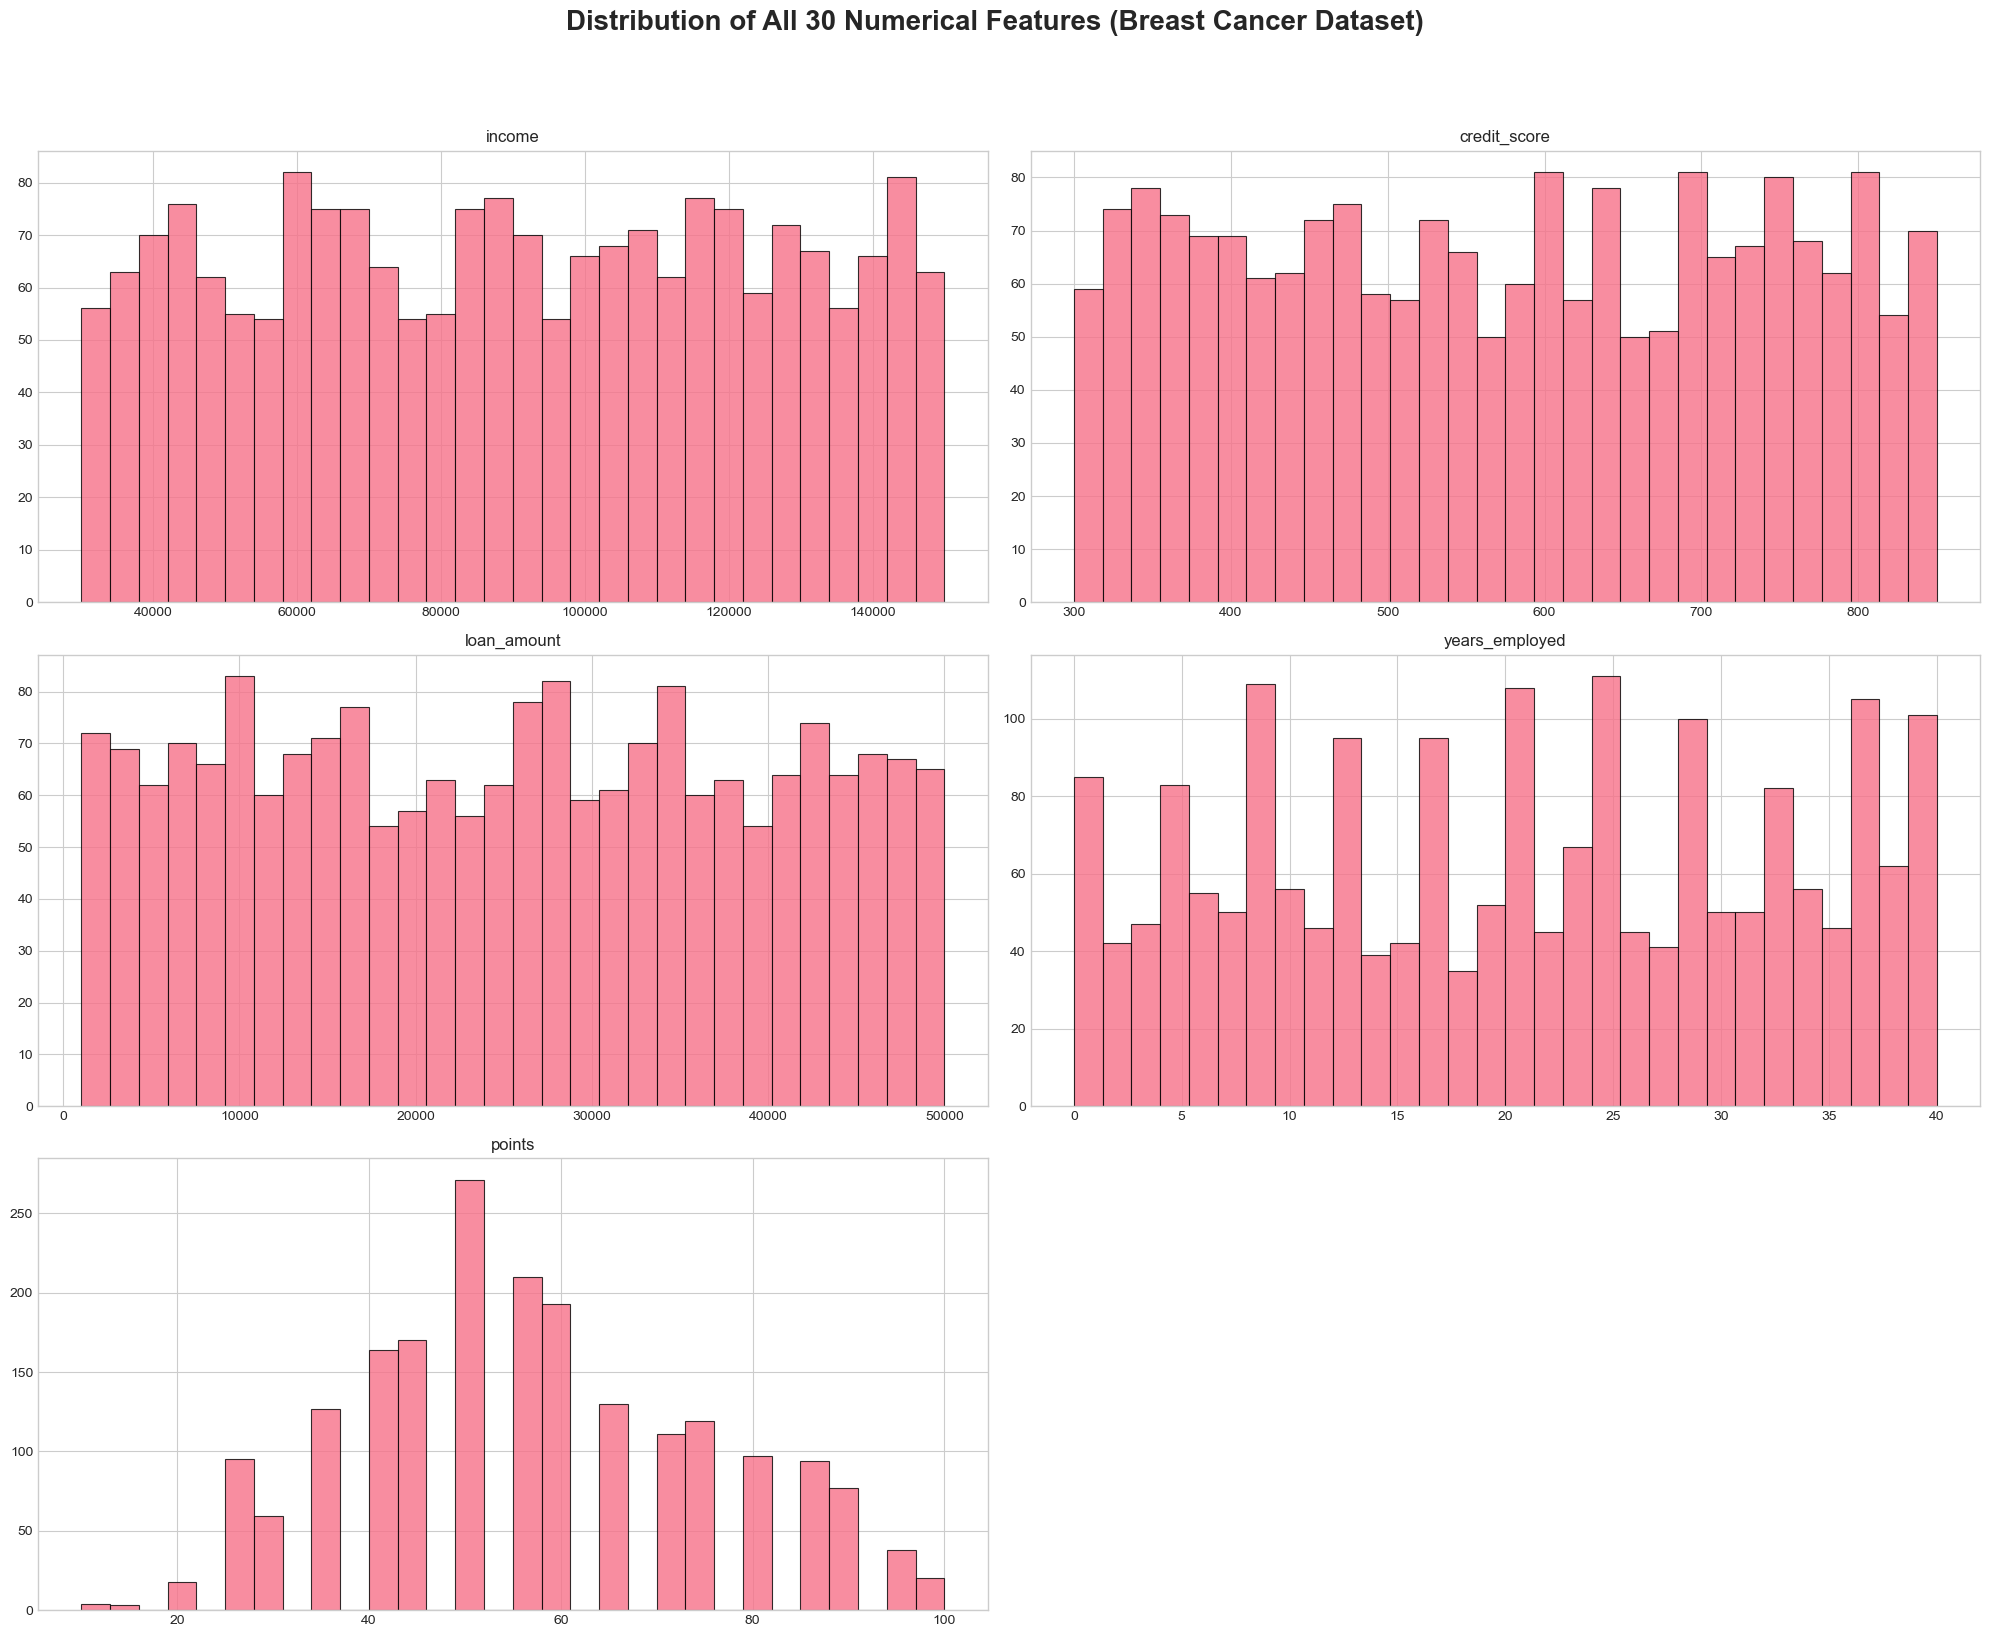

In [108]:
# Make sure we're only plotting the numeric features
data_to_plot = df_loan[num_cols]

# Set style for nicer plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create the histogram grid
fig = plt.figure(figsize=(12, 8))          # Big enough for 30 plots
data_to_plot.hist(bins=30,                    # 30 bins looks good for this dataset
                  figsize=(20, 16),
                  layout=(3, 2),              # 6 rows × 5 columns = 30 plots
                  edgecolor='black',
                  linewidth=0.8,
                  alpha=0.8)

# Main title
plt.suptitle('Distribution of All 30 Numerical Features (Breast Cancer Dataset)', 
             fontsize=20, fontweight='bold', y=1.02)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.98])   # Leaves room for the suptitle

plt.show()

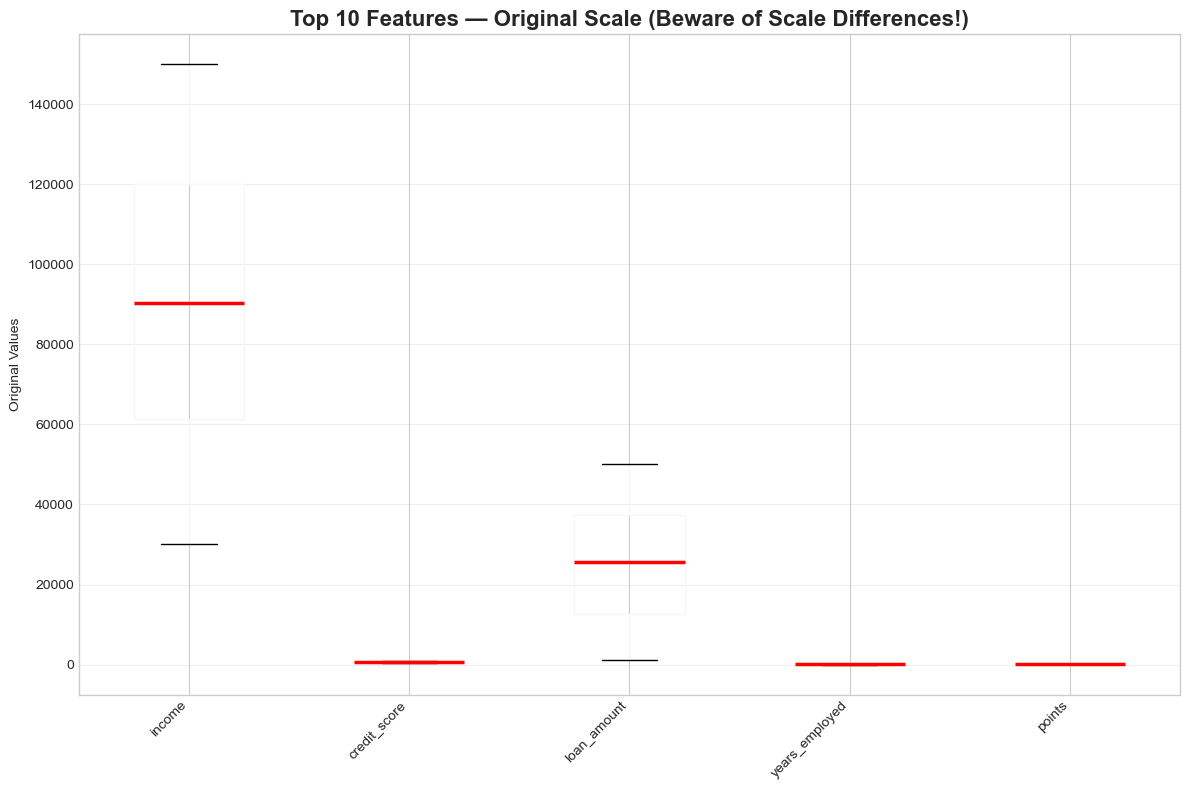

In [110]:
plt.figure(figsize=(12, 8))
df_loan[num_cols].boxplot(
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, alpha=0.6),
    medianprops=dict(color='red', linewidth=2.5)
)
plt.title("Top 10 Features — Original Scale (Beware of Scale Differences!)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Original Values")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [112]:
df_loan[terget_col].value_counts(normalize=True)

loan_approved
0                0.5605
1                0.4395
Name: proportion, dtype: float64

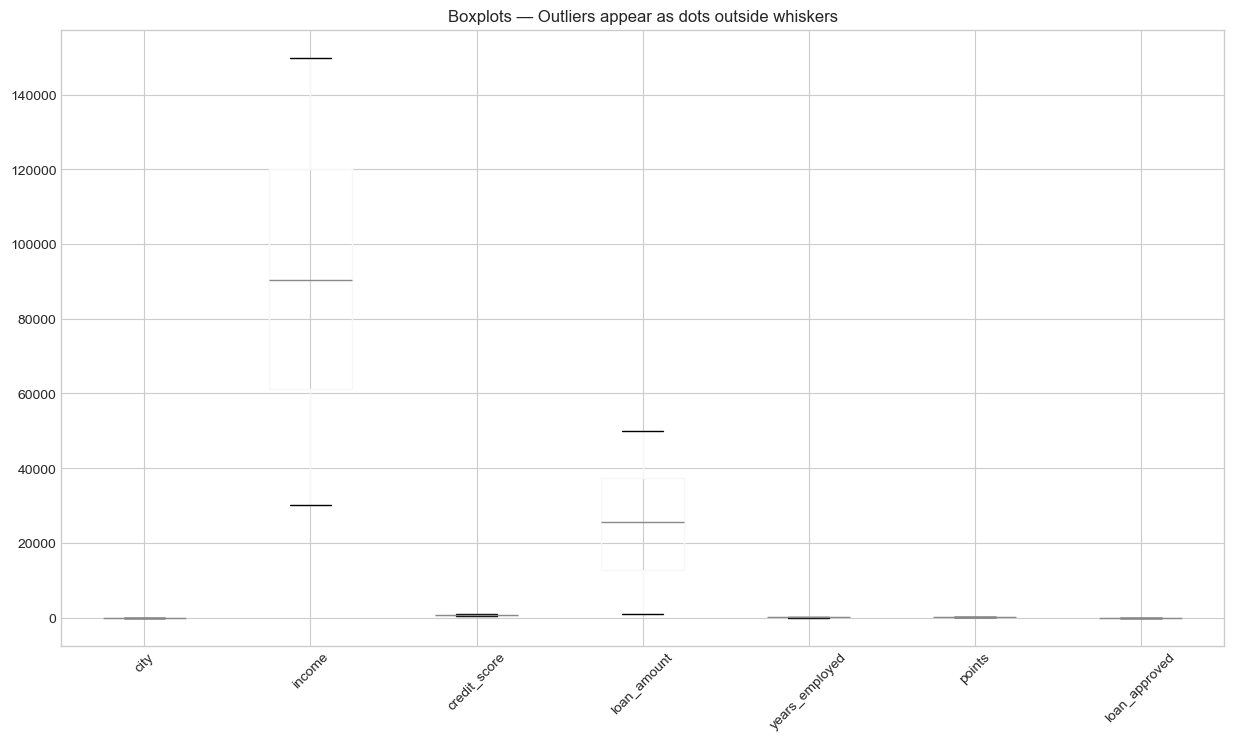

In [115]:
# Boxplots — instantly see outliers as dots
plt.figure(figsize=(15,8))
df_loan.boxplot()
plt.title("Boxplots — Outliers appear as dots outside whiskers")
plt.xticks(rotation=45)
plt.show()

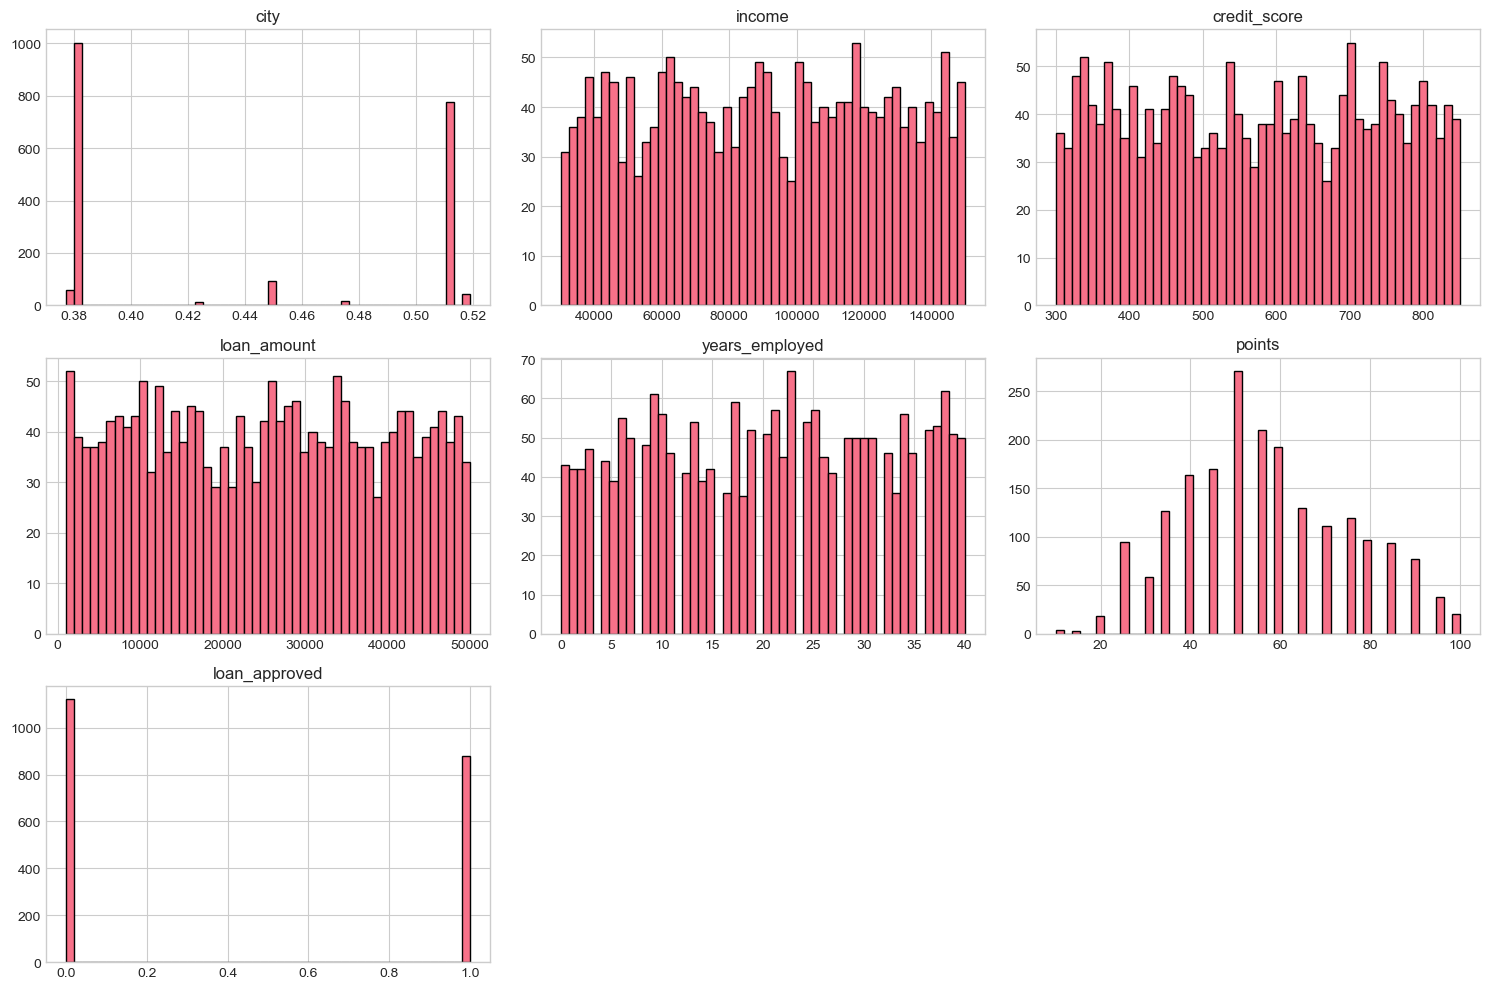

In [116]:
# Histograms + KDE — see skewed tails
df_loan.hist(figsize=(15,10), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

In [117]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df_loan.select_dtypes(include=np.number)))
outliers_z = np.where(z_scores > 3)  # >3 std is outlier
print(f"Rows with Z-score > 3: {len(set(outliers_z[0]))}")

Rows with Z-score > 3: 0


In [118]:
# Shows % of outliers per column — copy-paste this
def outlier_summary(df):
    print("OUTLIER PERCENTAGE PER COLUMN (IQR method)\n" + "="*50)
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_pct = ((df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))).mean() * 100
        print(f"{col:15} → {outlier_pct:5.2f}% outliers")

outlier_summary(df_loan)

OUTLIER PERCENTAGE PER COLUMN (IQR method)
city            →  0.00% outliers
income          →  0.00% outliers
credit_score    →  0.00% outliers
loan_amount     →  0.00% outliers
years_employed  →  0.00% outliers
points          →  0.00% outliers
loan_approved   →  0.00% outliers


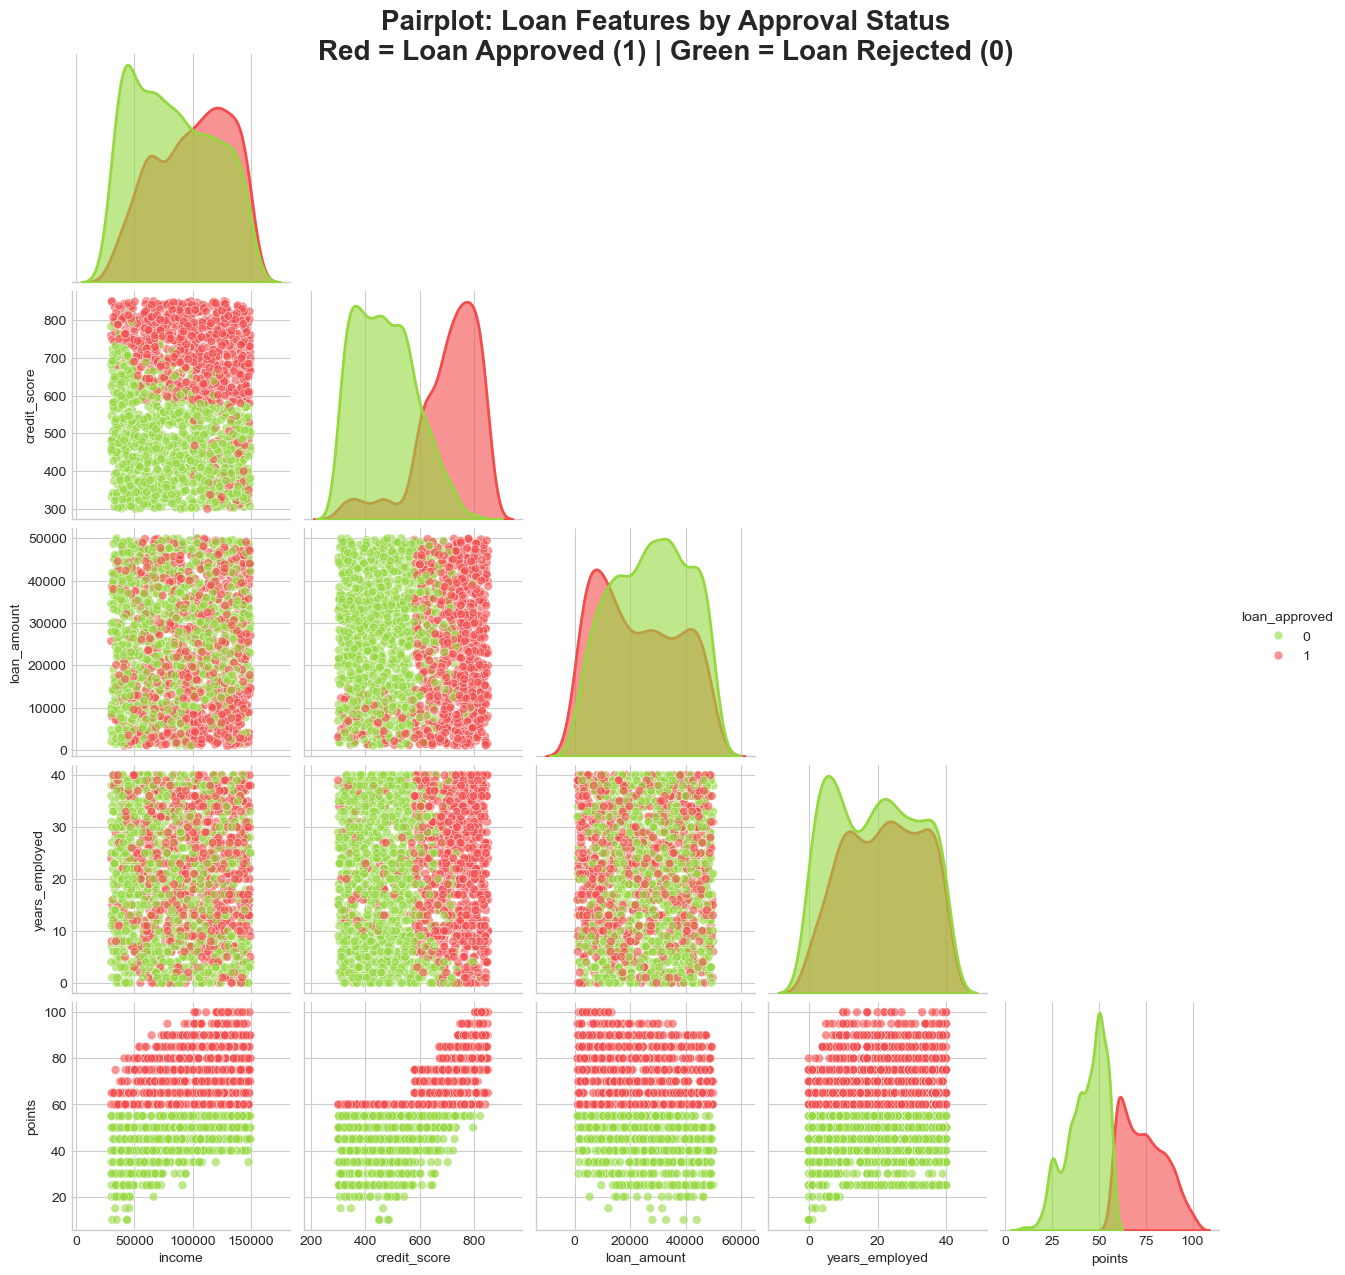

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# FIXED & PERFECT version for your LOAN dataset
sns.pairplot(
    data=df_loan,
    vars=["income", "credit_score", "loan_amount", "years_employed", "points"],
    hue='loan_approved',
    palette={0: '#95D840', 1: '#F24C4C'},        # Green = Not Approved, Red = Approved
    diag_kind='kde',                              # Smooth density on diagonal
    plot_kws={'alpha': 0.6, 's': 40},             # Transparent & smaller points
    diag_kws={'fill': True, 'alpha': 0.6, 'linewidth': 2},
    corner=True                                   # Optional: cleaner look (no duplicate plots)
)

# Correct title for LOAN dataset
plt.suptitle('Pairplot: Loan Features by Approval Status\n'
             'Red = Loan Approved (1) | Green = Loan Rejected (0)', 
             fontsize=20, fontweight='bold', y=1.02)

plt.show()

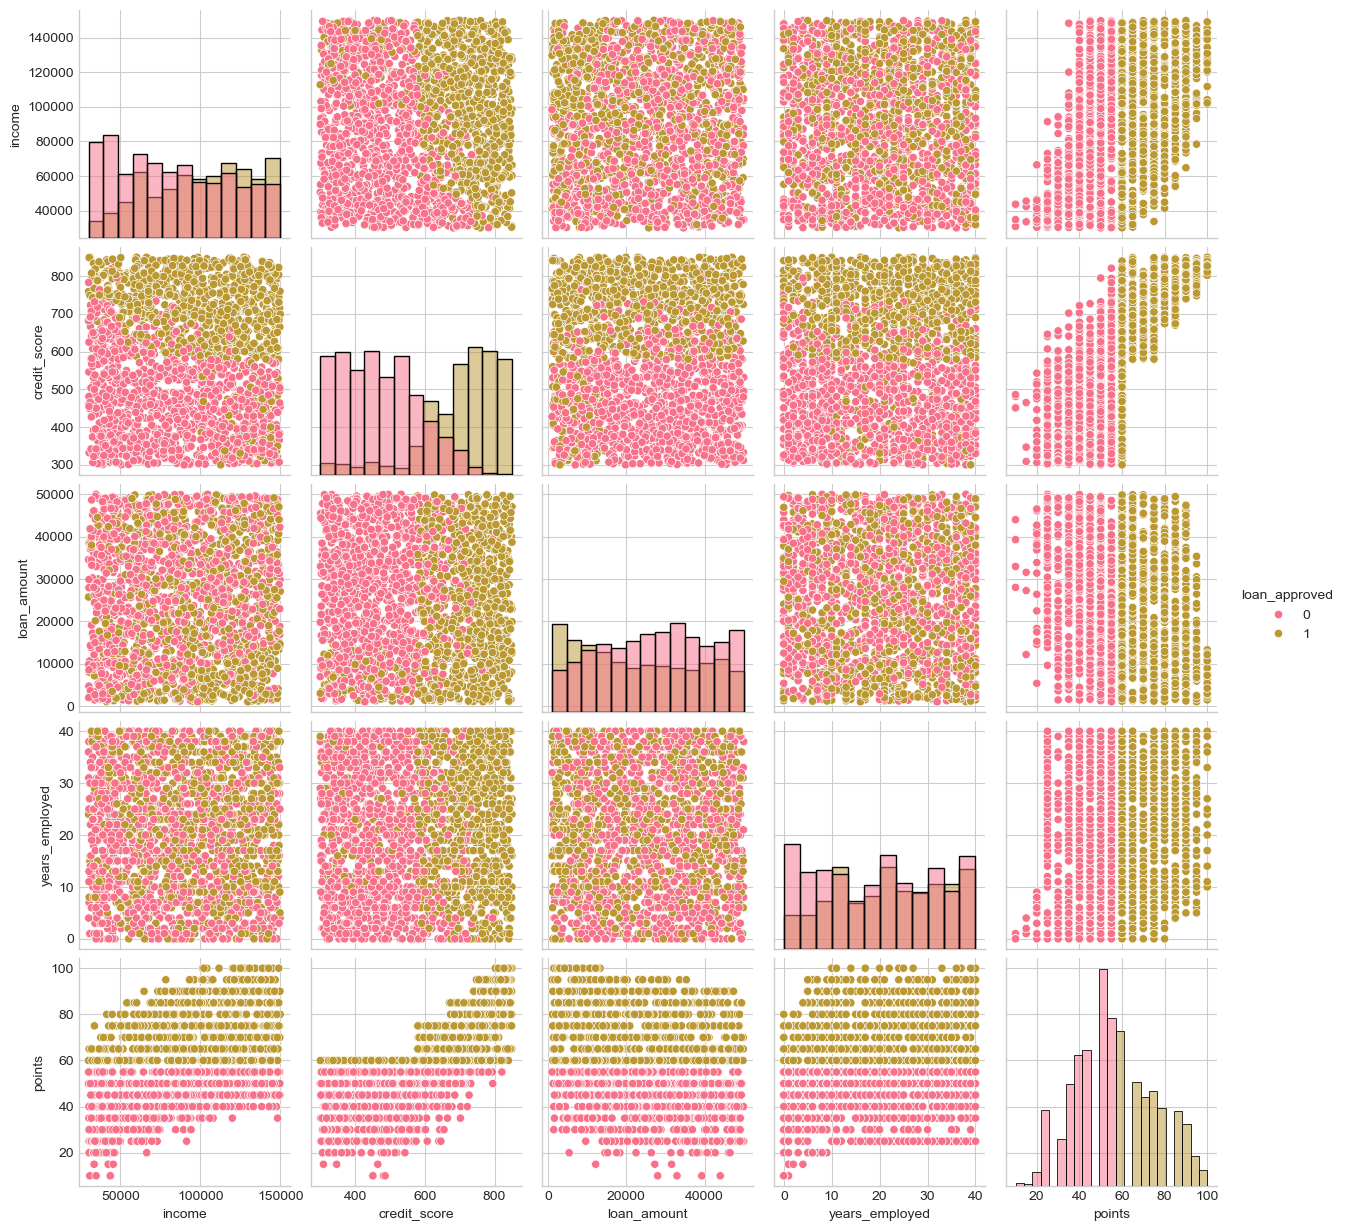

In [125]:
sns.pairplot(
    df_loan[["income", "credit_score", "loan_amount", "years_employed", "points", "loan_approved"]],  # ← use the correct name here
    hue="loan_approved",  # ← match this too
    diag_kind="hist"
)
plt.show()

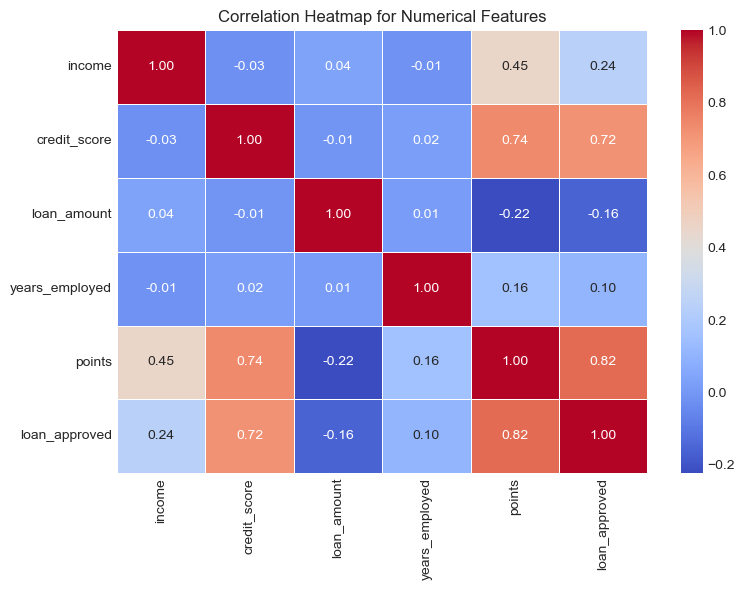

In [133]:
#Correlation Matrix and Heatmap
selected_columns = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points', 'loan_approved']
# Compute correlation matrix
corr_matrix = df_loan[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.show()

In [137]:
corr_matrix["loan_approved"].sort_values(ascending=False)


loan_approved     1.000000
points            0.821415
credit_score      0.715788
income            0.238066
years_employed    0.104408
loan_amount      -0.157859
Name: loan_approved, dtype: float64

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd

# Correct variable names (X and y, not x and y)
target_col = "loan_approved"
X = df_loan.drop(columns=[target_col])   # Features
y = df_loan[target_col]                  # Target (0 or 1)

# FIXED: Use capital X and y
print("X (features) shape:", X.shape)
print("y (target) shape:   ", y.shape)
print("\nTarget distribution:")
print(y.value_counts())

print("\nFirst 5 rows of features (X):")
print(X.head())

print("\nFirst 10 values of target (y):")
print(y.head(10).tolist())

X (features) shape: (2000, 6)
y (target) shape:    (2000,)

Target distribution:
loan_approved
0    1121
1     879
Name: count, dtype: int64

First 5 rows of features (X):
       city  income  credit_score  loan_amount  years_employed  points
0  0.377156  113810           389        39698              27    50.0
1  0.382317   44592           729        15446              28    55.0
2  0.382317   33278           584        11189              13    45.0
3  0.382317  127196           344        48823              29    50.0
4  0.382317   66048           496        47174               4    25.0

First 10 values of target (y):
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [144]:
# Standard Scaling
scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)#mean and SD will be calcualted from X_train
X_test_std = scaler_sd.transform(X_test)

In [145]:
print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns, index = X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_test.columns, index = X_test.index)
print("\nFirst 5 rows of X_train & X_test (Standard Scaled):")
display(X_train_std_df.head())
display(X_test_std_df.head())



--- Displaying Standard Scaled Data ---

First 5 rows of X_train & X_test (Standard Scaled):


,city,income,credit_score,loan_amount,years_employed,points
1738,-0.91403,0.828809,-0.653888,1.416707,-0.306828,-0.350568
548,1.15249,1.696654,0.622185,0.956795,-0.475507,0.977342
936,1.15249,-0.016257,1.596192,0.181170,-0.222488,1.508506
1389,-0.91403,0.226770,-0.542925,1.261327,1.295625,-0.881732
1607,1.15249,-1.204337,1.590028,-0.938611,-1.150224,0.446178


,city,income,credit_score,loan_amount,years_employed,points
1860,-0.91403,1.167517,-0.783344,-0.646249,-0.897205,-0.084986
353,1.15249,-1.050387,1.442077,-1.090524,0.030531,1.508506
1333,1.15249,0.447193,0.763971,0.462707,1.211286,0.977342
905,1.15249,-0.468362,0.455741,-1.344537,-0.053809,0.446178
1289,1.15249,-1.477764,1.405090,-0.936913,0.789587,0.711760


In [149]:
# MinMax Scaling
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

In [147]:
print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_mm_df = pd.DataFrame(X_train_mm, columns = X_train.columns, index = X_train.index)
X_test_mm_df = pd.DataFrame(X_test_mm, columns = X_test.columns, index = X_test.index)

print("\nFirst 5 rows of X_train (Minmax Scaled):")
display(X_train_mm_df.head())
display(X_test_mm_df.head())


--- Displaying Standard Scaled Data ---

First 5 rows of X_train (Minmax Scaled):


,city,income,credit_score,loan_amount,years_employed,points
1738,0.036382,0.738786,0.305455,0.911244,0.425,0.444444
548,0.953601,0.987614,0.681818,0.778529,0.375,0.722222
936,0.953601,0.496488,0.969091,0.554709,0.450,0.833333
1389,0.036382,0.566169,0.338182,0.866407,0.900,0.333333
1607,0.953601,0.155843,0.967273,0.231578,0.175,0.611111


,city,income,credit_score,loan_amount,years_employed,points
1860,0.036382,0.835900,0.267273,0.315944,0.250,0.500000
353,0.953601,0.199983,0.923636,0.187741,0.525,0.833333
1333,0.953601,0.629369,0.723636,0.635952,0.875,0.722222
905,0.953601,0.366861,0.632727,0.114441,0.500,0.611111
1289,0.953601,0.077446,0.912727,0.232068,0.750,0.666667


In [150]:
scaler_rb = RobustScaler()
X_train_rb = scaler_rb.fit_transform(X_train)
X_test_rb = scaler_rb.transform(X_test)

In [151]:
print("\n--- Displaying scaler_rb Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_rb_df = pd.DataFrame(X_train_rb, columns = X_train.columns, index = X_train.index)
X_test_rb_df = pd.DataFrame(X_test_rb, columns = X_test.columns, index = X_test.index)

print("\nFirst 5 rows of X_train (Minmax Scaled):")
display(X_train_rb_df.head())
display(X_test_rb_df.head())


--- Displaying scaler_rb Scaled Data ---

First 5 rows of X_train (Minmax Scaled):


,city,income,credit_score,loan_amount,years_employed,points
1738,0.0,0.489337,-0.371972,0.814682,-0.190476,-0.2
548,1.0,0.996861,0.344291,0.544644,-0.285714,0.8
936,1.0,-0.004866,0.891003,0.089237,-0.142857,1.2
1389,0.0,0.137259,-0.309689,0.723451,0.714286,-0.6
1607,1.0,-0.699666,0.887543,-0.568242,-0.666667,0.4


,city,income,credit_score,loan_amount,years_employed,points
1860,0.0,0.687417,-0.444637,-0.396581,-0.523810,0.0
353,1.0,-0.609634,0.804498,-0.657437,0.000000,1.2
1333,1.0,0.266164,0.423875,0.254541,0.666667,0.8
905,1.0,-0.269261,0.250865,-0.806581,-0.047619,0.4
1289,1.0,-0.859568,0.783737,-0.567244,0.428571,0.6


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



results = {}

# StandardScaler
sc1 = StandardScaler()
X_train_std = sc1.fit_transform(X_train)
X_test_std = sc1.transform(X_test)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_std, y_train)
results["StandardScaler"] = accuracy_score(y_test, model.predict(X_test_std))

# MinMaxScaler
sc2 = MinMaxScaler()
X_train_mm = sc2.fit_transform(X_train)
X_test_mm = sc2.transform(X_test)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_mm, y_train)
results["MinMaxScaler"] = accuracy_score(y_test, model.predict(X_test_mm))

# RobustScaler
sc3 = RobustScaler()
X_train_rb = sc3.fit_transform(X_train)
X_test_rb = sc3.transform(X_test)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_rb, y_train)
results["RobustScaler"] = accuracy_score(y_test, model.predict(X_test_rb))

results

{'StandardScaler': 0.996, 'MinMaxScaler': 0.996, 'RobustScaler': 0.996}

In [ ]:
This loan ML